In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
df = pd.read_csv ('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:

df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
#Replace any values marked as 'unknown' with Null
df.replace("Unknown", np.nan, inplace = True)

In [7]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [8]:
print("Addrtype: \n", df['ADDRTYPE'].value_counts(), "\n")
print("Vehcount: \n", df['VEHCOUNT'].value_counts(), "\n")
print("Lightcond: \n", df['LIGHTCOND'].value_counts(), "\n")
print("Weather: \n", df['WEATHER'].value_counts(), "\n")
print("Hitparkedcar: \n", df['HITPARKEDCAR'].value_counts(), "\n")
print("Severity Code: \n", df['SEVERITYCODE'].value_counts(), "\n")
print("Severity Desc: \n", df['SEVERITYDESC'].value_counts(), "\n")
print("Underinfl: \n", df['UNDERINFL'].value_counts(), "\n")
print("Inattentionind: \n", df['INATTENTIONIND'].value_counts(), "\n")

for col in df.columns:
  print(col, ": \n",  df[col].value_counts(), "\n")

Addrtype: 
 Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64 

Vehcount: 
 2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64 

Lightcond: 
 Daylight                    116137
Dark - Street Lights On      48507
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64 

Weather: 
 Clear                       111135
Raining                      33145
Overcast                     27714
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy            

In [9]:
#look for missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [10]:
#Drop rows with missing values from important features
df.dropna(subset=["SEVERITYDESC"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["UNDERINFL"], axis=0, inplace=True)
df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
print(df.shape)
print(df['SEVERITYDESC'].value_counts())

(167840, 38)
Property Damage Only Collision    112367
Injury Collision                   55473
Name: SEVERITYDESC, dtype: int64


In [11]:
#Replace HITPARKEDCAR feature with 0 for 'no' and 1 for 'yes'
print("HITPARKEDCAR before: \n", df['HITPARKEDCAR'].value_counts())
df['HITPARKEDCAR'].replace("N", 0, inplace=True)
df['HITPARKEDCAR'].replace("Y", 1, inplace=True)
print("HITPARKEDCAR after \n: ", df['HITPARKEDCAR'].value_counts())

#Replace SPEEDING feature with 0 for 'no' and 1 for 'yes'
print("Speeding before: \n", df['SPEEDING'].value_counts())
df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace("Y", 1, inplace=True)
print("Speeding after \n: ", df['SPEEDING'].value_counts())

#Fix UNDERINFL feature with 0 for 'no' and 1 for 'yes'
print("UNDERINFL before: \n", df['UNDERINFL'].value_counts())
df['UNDERINFL'].replace("N", "0", inplace=True)
df['UNDERINFL'].replace("Y", "1", inplace=True)
print("UNDERINFL after: \n", df['UNDERINFL'].value_counts())

#Fix INATTENTIONIND feature with 0 for 'no' and 1 for 'yes'
print("INATTENTIONIND before: \n", df['INATTENTIONIND'].value_counts())
df['INATTENTIONIND'].replace(np.nan, "0", inplace=True)
df['INATTENTIONIND'].replace("Y", "1", inplace=True)
print("INATTENTIONIND after: \n", df['INATTENTIONIND'].value_counts())

#Make ADDRTYPE integers 1="Block", 2="Intersection", 3="Alley"
print("ADDRTYPE before: \n", df['ADDRTYPE'].value_counts())
df['ADDRTYPE'].replace("Block", 1, inplace=True)
df['ADDRTYPE'].replace("Intersection", 2, inplace=True)
df['ADDRTYPE'].replace("Alley", 3, inplace=True)
print("ADDRTYPE after: \n", df['ADDRTYPE'].value_counts())

#Make new severity column with integers:  1 = "Property Damage" or "Injury", 2 = "Serious Injury" or "Fatality"
df = df.assign(SEVERITY = df['SEVERITYCODE'])
df.loc[df['SEVERITYCODE'] == '1', 'SEVERITY'] = 1
df.loc[df['SEVERITYCODE'] == '2', 'SEVERITY'] = 1
df.loc[df['SEVERITYCODE'] == '2b', 'SEVERITY'] = 2
df.loc[df['SEVERITYCODE'] == '3', 'SEVERITY'] = 2
df['SEVERITY'].value_counts()

HITPARKEDCAR before: 
 N    163380
Y      4460
Name: HITPARKEDCAR, dtype: int64
HITPARKEDCAR after 
:  0    163380
1      4460
Name: HITPARKEDCAR, dtype: int64
Speeding before: 
 Y    9025
Name: SPEEDING, dtype: int64
Speeding after 
:  0    158815
1      9025
Name: SPEEDING, dtype: int64
UNDERINFL before: 
 N    87779
0    71163
Y     4967
1     3931
Name: UNDERINFL, dtype: int64
UNDERINFL after: 
 0    158942
1      8898
Name: UNDERINFL, dtype: int64
INATTENTIONIND before: 
 Y    28313
Name: INATTENTIONIND, dtype: int64
INATTENTIONIND after: 
 0    139527
1     28313
Name: INATTENTIONIND, dtype: int64
ADDRTYPE before: 
 Block           106340
Intersection     61318
Alley              182
Name: ADDRTYPE, dtype: int64
ADDRTYPE after: 
 1    106340
2     61318
3       182
Name: ADDRTYPE, dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


1    112367
2     55473
Name: SEVERITY, dtype: int64

In [12]:
# Create date, time of day, weekday, and hour fields to explore potential correlations with accident severity

df.head()
df['INCDATE'] =  pd.to_datetime(df['INCDATE'])
df['INCDTTM2'] =  pd.to_datetime(df['INCDTTM'])
df['INCTIME'] = df['INCDTTM2'].dt.strftime('%H:%M')
df['INCHOUR'] = df['INCDTTM2'].dt.strftime('%H')
df['INCHOUR'].value_counts()


df['WEEKDAY'] = df['INCDATE'].dt.day_name()
df.loc[df['WEEKDAY'] == 'Sunday', 'WEEKDAY'] = 0
df.loc[df['WEEKDAY'] == 'Monday', 'WEEKDAY'] = 1
df.loc[df['WEEKDAY'] == 'Tuesday', 'WEEKDAY'] = 2
df.loc[df['WEEKDAY'] == 'Wednesday', 'WEEKDAY'] = 3
df.loc[df['WEEKDAY'] == 'Thursday', 'WEEKDAY'] = 4
df.loc[df['WEEKDAY'] == 'Friday', 'WEEKDAY'] = 5
df.loc[df['WEEKDAY'] == 'Saturday', 'WEEKDAY'] = 6
df['WEEKDAY'].value_counts()

df['TIMEOFDAY'] = df['INCHOUR']
df.loc[df['TIMEOFDAY'] == '00', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '01', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '02', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '03', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '04', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '05', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '06', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '07', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '08', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '09', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '10', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '11', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '12', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '13', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '14', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '15', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '16', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '17', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '18', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '19', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '20', 'TIMEOFDAY'] = "Evening"
df.loc[df['TIMEOFDAY'] == '21', 'TIMEOFDAY'] = "Evening"
df.loc[df['TIMEOFDAY'] == '22', 'TIMEOFDAY'] = "Evening"
df.loc[df['TIMEOFDAY'] == '23', 'TIMEOFDAY'] = "Evening"

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITY,INCDTTM2,INCTIME,INCHOUR,WEEKDAY,TIMEOFDAY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,2,37475.0,...,Entering at angle,0,0,0,2,2013-03-27 14:54:00,14:54,14,3,Mid Day
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,1,NaN,...,From same direction - both going straight - bo...,0,0,0,1,2006-12-20 18:55:00,18:55,18,3,Afternoon Commute
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,1,NaN,...,One parked--one moving,0,0,0,1,2004-11-18 10:20:00,10:20,10,4,Mid Day
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,1,NaN,...,From same direction - all others,0,0,0,1,2013-03-29 09:26:00,09:26,09,5,Morning Commute
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,2,34387.0,...,Entering at angle,0,0,0,2,2004-01-28 08:04:00,08:04,08,3,Morning Commute


SEVERITY     1     2
YEAR                
2004      7366  3588
2005      9388  4337
2006      9614  4223
2007      9093  3909
2008      8142  3631
2009      6551  3291
2010      6157  3130
2011      5984  2991
2012      5891  3217
2013      5904  3062
2014      6477  3272
2015      6501  3515
2016      6510  3486
2017      6564  3307
2018      6051  3216
2019      5361  2917
2020       813   381


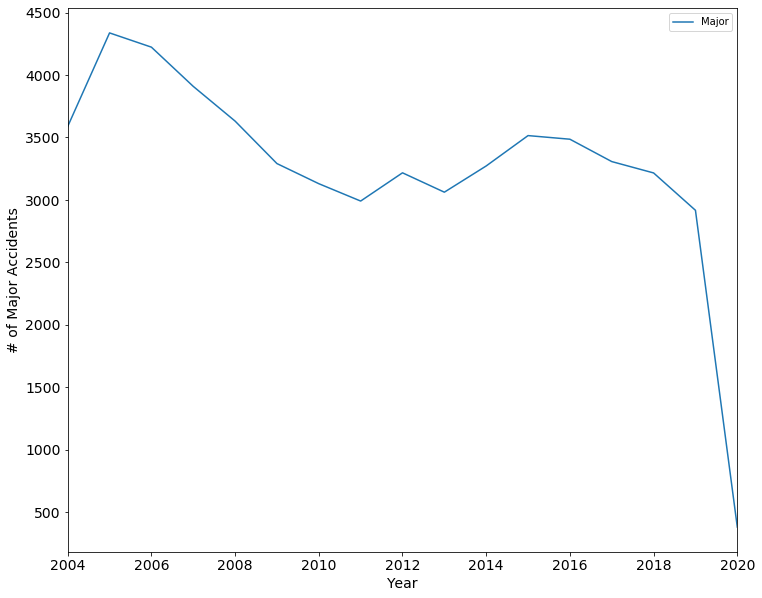

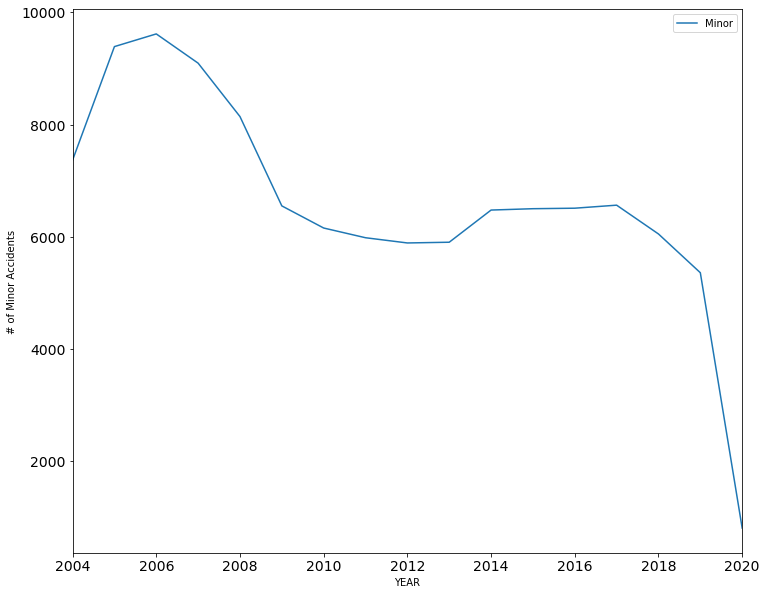

In [13]:

df['YEAR'] = pd.DatetimeIndex(df['INCDATE']).year
#df.head()

df[["SEVERITY"]] = df[["SEVERITY"]].astype("int")

print(pd.crosstab(df['SEVERITY'], df['YEAR']).T)

import matplotlib.pyplot as plt

df_bar = pd.crosstab(df['SEVERITY'], df['YEAR'])

df_barT = df_bar.T
df_barT.columns = ["Minor", "Major"]
df_barT
df_major = df_barT[['Major']]
df_minor = df_barT[['Minor']]

df_major.plot(figsize=(12,10), fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("# of Major Accidents", fontsize = 14)
plt.show()

df_minor.plot(figsize=(12,10), fontsize = 14)
plt.ylabel("# of Minor Accidents")
plt.show()

In [14]:
#Keep only columns we might consider using or that we want to investigate further
df2 = df[['WEEKDAY', 'PERSONCOUNT', 'ADDRTYPE', 'HITPARKEDCAR', 'JUNCTIONTYPE', 'COLLISIONTYPE', 'SPEEDING', 'VEHCOUNT', 'UNDERINFL', 'INATTENTIONIND', 'TIMEOFDAY', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITY']]
df2.head()

,WEEKDAY,PERSONCOUNT,ADDRTYPE,HITPARKEDCAR,JUNCTIONTYPE,COLLISIONTYPE,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,TIMEOFDAY,WEATHER,ROADCOND,LIGHTCOND,SEVERITY
0,3,2,2,0,At Intersection (intersection related),Angles,0,2,0,0,Mid Day,Overcast,Wet,Daylight,2
1,3,2,1,0,Mid-Block (not related to intersection),Sideswipe,0,2,0,0,Afternoon Commute,Raining,Wet,Dark - Street Lights On,1
2,4,4,1,0,Mid-Block (not related to intersection),Parked Car,0,3,0,0,Mid Day,Overcast,Dry,Daylight,1
3,5,3,1,0,Mid-Block (not related to intersection),Other,0,3,0,0,Morning Commute,Clear,Dry,Daylight,1
4,3,2,2,0,At Intersection (intersection related),Angles,0,2,0,0,Morning Commute,Raining,Wet,Daylight,2


In [15]:
#convert datatypes to prep for modeling

df2[["SEVERITY"]] = df[["SEVERITY"]].astype("int")
df2[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")
df2[["SPEEDING"]] = df[["SPEEDING"]].astype("int")
df2[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")
df2[["VEHCOUNT"]] = df[["VEHCOUNT"]].astype("int")
df2[["ADDRTYPE"]] = df[["ADDRTYPE"]].astype("int")

df2[["WEEKDAY"]] = df[["WEEKDAY"]].astype("int")
#df2[["INCHOUR"]] = df[["INCHOUR"]].astype("int")
df2.dtypes

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


WEEKDAY            int64
PERSONCOUNT        int64
ADDRTYPE           int64
HITPARKEDCAR       int64
JUNCTIONTYPE      object
COLLISIONTYPE     object
SPEEDING           int64
VEHCOUNT           int64
UNDERINFL          int64
INATTENTIONIND     int64
TIMEOFDAY         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SEVERITY           int64
dtype: object

In [16]:

import sklearn.feature_selection
df_temp = df2[['WEEKDAY', 'ADDRTYPE', 'HITPARKEDCAR', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']]
chi_sq = sklearn.feature_selection.chi2(df_temp, df2['SEVERITY'])

pd.options.display.float_format = '{:,.15f}'.format
chi_sq_tab = pd.DataFrame(chi_sq)
chi_sq_tab.columns = df_temp.columns
chi_sq_tab

,WEEKDAY,ADDRTYPE,HITPARKEDCAR,SPEEDING,UNDERINFL,INATTENTIONIND
0,1.072014567273746,833.800725327642454,"1,177.707898094013672",108.805123247888815,153.701916861611494,110.820738891015878
1,0.300490845780688,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000


In [17]:
#balance dataset - equal samples of severe vs. minor accidents

#del df3

is_prop = df2['SEVERITY'] == 1
df3 = df2[is_prop].sample(n=9500)

is_serfatinjury = df2['SEVERITY'] == 2
df_serinj = df2[is_serfatinjury]
df3 = df3.append([df_serinj]*3, ignore_index=True)  #oversample more serious injuries / accidents

df3.reset_index(inplace=True)

df3['SEVERITY'].value_counts()

2    166419
1      9500
Name: SEVERITY, dtype: int64

In [18]:
df3.head()

,index,WEEKDAY,PERSONCOUNT,ADDRTYPE,HITPARKEDCAR,JUNCTIONTYPE,COLLISIONTYPE,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,TIMEOFDAY,WEATHER,ROADCOND,LIGHTCOND,SEVERITY
0,0,5,2,2,0,At Intersection (intersection related),Angles,0,2,0,1,Mid Day,Overcast,Dry,Daylight,1
1,1,4,2,1,0,Mid-Block (not related to intersection),Sideswipe,0,2,0,0,Morning Commute,Clear,Dry,Daylight,1
2,2,5,2,1,0,Mid-Block (not related to intersection),Sideswipe,0,2,0,0,Morning Commute,Overcast,Dry,Daylight,1
3,3,0,3,1,0,Mid-Block (not related to intersection),Other,0,2,0,0,Mid Day,Clear,Dry,Daylight,1
4,4,6,2,1,0,Driveway Junction,Angles,1,2,1,0,Mid Day,Clear,Dry,Daylight,1


SPEEDING                 0                 1
SEVERITY                                    
1        0.952947368421053 0.047052631578947
2        0.937825608854758 0.062174391145242


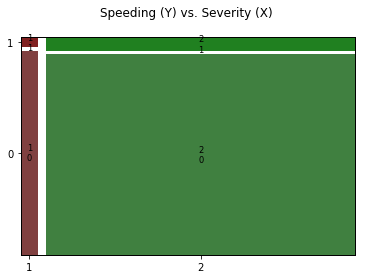

UNDERINFL                 0                 1
SEVERITY                                     
1         0.951894736842105 0.048105263157895
2         0.937068483766878 0.062931516233122


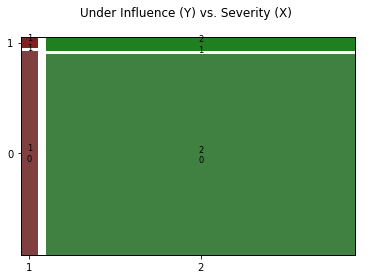

COLLISIONTYPE            Angles            Cycles           Head On  \
SEVERITY                                                              
1             0.182631578947368 0.003789473684211 0.008000000000000   
2             0.241378688731455 0.082779009608278 0.015448957150325   

COLLISIONTYPE         Left Turn             Other        Parked Car  \
SEVERITY                                                              
1             0.068842105263158 0.144421052631579 0.271157894736842   
2             0.096299100463288 0.106285940908190 0.046545166116850   

COLLISIONTYPE        Pedestrian        Rear Ended        Right Turn  \
SEVERITY                                                              
1             0.005263157894737 0.164842105263158 0.018842105263158   
2             0.101707136805293 0.255421556432859 0.010707911957168   

COLLISIONTYPE         Sideswipe  
SEVERITY                         
1             0.132210526315789  
2             0.043426531826294  


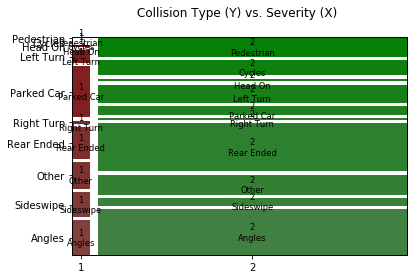

ROADCOND               Dry               Ice               Oil  \
SEVERITY                                                         
1        0.719789473684211 0.007578947368421 0.000315789473684   
2        0.711391127215041 0.004723018405350 0.000432642907360   

ROADCOND             Other     Sand/Mud/Dirt        Snow/Slush  \
SEVERITY                                                         
1        0.000736842105263 0.000947368421053 0.005052631578947   
2        0.000757125087881 0.000378562543940 0.002812178897842   

ROADCOND    Standing Water               Wet  
SEVERITY                                      
1        0.000736842105263 0.264842105263158  
2        0.000522776846394 0.278982568096191  


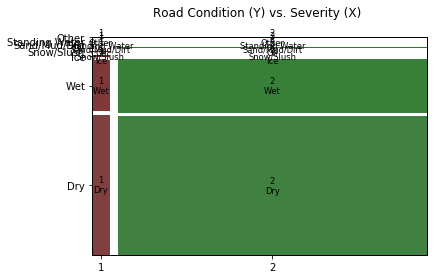

LIGHTCOND  Dark - No Street Lights  Dark - Street Lights Off  \
SEVERITY                                                       
1                0.008736842105263         0.006947368421053   
2                0.005750545310331         0.005534223856651   

LIGHTCOND  Dark - Street Lights On  Dark - Unknown Lighting              Dawn  \
SEVERITY                                                                        
1                0.275157894736842        0.000000000000000 0.013578947368421   
2                0.255944333279253        0.000072107151227 0.014511564184378   

LIGHTCOND          Daylight              Dusk             Other  
SEVERITY                                                         
1         0.658210526315789 0.035789473684211 0.001578947368421  
2         0.683215257873200 0.034088655742433 0.000883312602527  


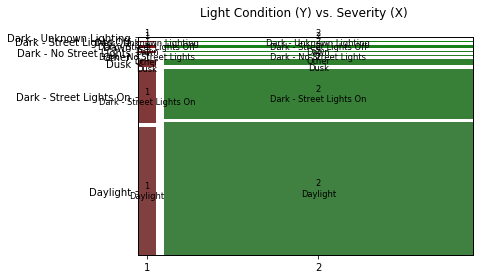

TIMEOFDAY  Afternoon Commute           Evening        Late_Night  \
SEVERITY                                                           
1          0.216000000000000 0.112421052631579 0.211789473684211   
2          0.246444216105132 0.105114199700755 0.183530726659816   

TIMEOFDAY           Mid Day   Morning Commute  
SEVERITY                                       
1         0.317473684210526 0.142315789473684  
2         0.311719214753123 0.153191642781173  


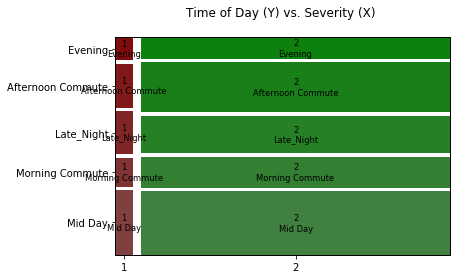

ADDRTYPE                 1                 2                 3
SEVERITY                                                      
1        0.700105263157895 0.298210526315789 0.001684210526316
2        0.515692318785716 0.483802931155697 0.000504750058587


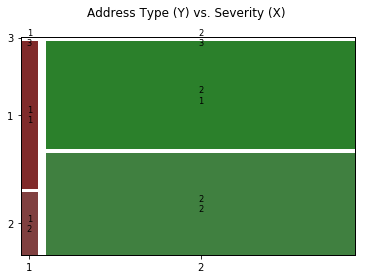

JUNCTIONTYPE  At Intersection (but not related to intersection)  \
SEVERITY                                                          
1                                             0.010736842105263   
2                                             0.010834099471815   

JUNCTIONTYPE  At Intersection (intersection related)  Driveway Junction  \
SEVERITY                                                                  
1                                  0.287157894736842  0.068000000000000   
2                                  0.472788563805815  0.056459899410524   

JUNCTIONTYPE  Mid-Block (but intersection related)  \
SEVERITY                                             
1                                0.122736842105263   
2                                0.125917112829665   

JUNCTIONTYPE  Mid-Block (not related to intersection)     Ramp Junction  
SEVERITY                                                                 
1                                   0.510210526315789 0.001157894

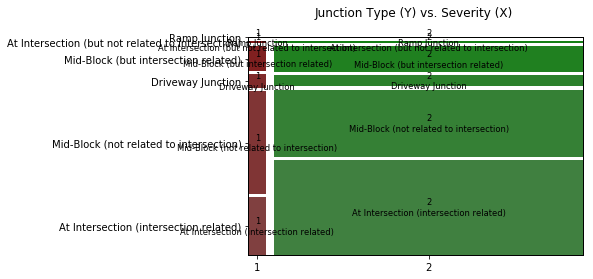

INATTENTIONIND                 0                 1
SEVERITY                                          
1              0.845263157894737 0.154736842105263
2              0.816289005462117 0.183710994537883


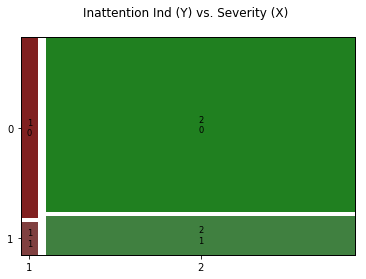

WEATHER   Blowing Sand/Dirt             Clear    Fog/Smog/Smoke  \
SEVERITY                                                          
1         0.000210526315789 0.643789473684211 0.002315789473684   
2         0.000234348241487 0.638094207993078 0.003280875380816   

WEATHER              Other          Overcast     Partly Cloudy  \
SEVERITY                                                         
1        0.001368421052632 0.157578947368421 0.000000000000000   
2        0.001406089448921 0.154615759017901 0.000054080363420   

WEATHER            Raining  Severe Crosswind  Sleet/Hail/Freezing Rain  \
SEVERITY                                                                 
1        0.188421052631579 0.000210526315789         0.000315789473684   
2        0.198745335568655 0.000126187514647         0.000486723270780   

WEATHER            Snowing  
SEVERITY                    
1        0.005789473684211  
2        0.002956393200296  


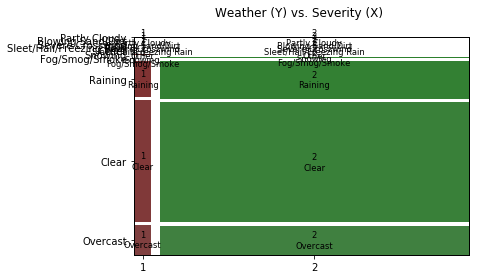

TIMEOFDAY,Afternoon Commute,Evening,Late_Night,Mid Day,Morning Commute
SEVERITY,,,,,
1,0.216000000000000,0.112421052631579,0.211789473684211,0.317473684210526,0.142315789473684
2,0.246444216105132,0.105114199700755,0.183530726659816,0.311719214753123,0.153191642781173


In [19]:
#mosaic
from statsmodels.graphics.mosaicplot import mosaic

print(pd.crosstab(df3['SEVERITY'], df3['SPEEDING']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'SPEEDING'], gap=.025, title = "Speeding (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['UNDERINFL']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'UNDERINFL'], gap=.025, title = "Under Influence (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['COLLISIONTYPE']).apply(lambda r: r/r.sum(), axis=1))
xtabcolltype =  pd.crosstab(df3['SEVERITY'], df3['COLLISIONTYPE']).apply(lambda r: r/r.sum(), axis=1)
mosaic(df3, ['SEVERITY', 'COLLISIONTYPE'], gap=.025, title = "Collision Type (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['ROADCOND']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'ROADCOND'], gap=.025, title = "Road Condition (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['LIGHTCOND']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'LIGHTCOND'], gap=.025, title = "Light Condition (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['TIMEOFDAY']).apply(lambda r: r/r.sum(), axis=1))
xtabtime =  pd.crosstab(df3['SEVERITY'], df3['TIMEOFDAY']).apply(lambda r: r/r.sum(), axis=1)
mosaic(df3, ['SEVERITY', 'TIMEOFDAY'], gap=.025, title = "Time of Day (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['ADDRTYPE']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'ADDRTYPE'], gap=.025, title = "Address Type (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['JUNCTIONTYPE']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'JUNCTIONTYPE'], gap=.025, title = "Junction Type (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['INATTENTIONIND']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'INATTENTIONIND'], gap=.025, title = "Inattention Ind (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['WEATHER']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'WEATHER'], gap=.025, title = "Weather (Y) vs. Severity (X) \n")
plt.show()

xtabtime.head()

In [20]:
#one hot encoding

one_hot_features = df3[['WEATHER', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY','COLLISIONTYPE', 'JUNCTIONTYPE','TIMEOFDAY']]
converted_one_hot = pd.get_dummies(data=one_hot_features, columns=['WEATHER', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY','COLLISIONTYPE', 'JUNCTIONTYPE', 'TIMEOFDAY'])
df3 = df3.drop(['WEATHER', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY','COLLISIONTYPE', 'JUNCTIONTYPE', 'TIMEOFDAY'],axis = 1)
df3 = df3.join(converted_one_hot)
df3.head()

,index,PERSONCOUNT,HITPARKEDCAR,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,SEVERITY,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,...,JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,TIMEOFDAY_Afternoon Commute,TIMEOFDAY_Evening,TIMEOFDAY_Late_Night,TIMEOFDAY_Mid Day,TIMEOFDAY_Morning Commute
0,0,2,0,0,2,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,2,0,0,2,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,2,0,0,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,3,0,0,2,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,4,2,0,1,2,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [22]:
#re-examine chi-squared statistics for one hot encoded variables to inform whether some can be dropped
import sklearn.feature_selection

dependent = df3['SEVERITY']

df_temp = df3.drop(['SEVERITY', 'index', 'VEHCOUNT', 'PERSONCOUNT' ], axis=1)
chi_sq = sklearn.feature_selection.chi2(df_temp, dependent)

chi_sq_tab = pd.DataFrame(chi_sq)
chi_sq_tab.columns = df_temp.columns
sorted_chi = chi_sq_tab.T.sort_values(by=[1], ascending=False)

to_be_dropped = sorted_chi.T.columns[0:19].to_list()

#create dataframe with all columns with chi-squared test p-value < .1 dropped
df_hold = df3.drop(to_be_dropped, axis=1)

#sorted_chi.to_csv('chi_sq_featureselect.csv')

In [23]:

#Re-examine correlation matrix for one hot encoded variables to inform whether some can be dropped
df5 = df3.corr()
df5.tail(25)
#df5 = df3.groupby(['INCHOUR', 'SEVERITY']).size()

,index,PERSONCOUNT,HITPARKEDCAR,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,SEVERITY,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,...,JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,TIMEOFDAY_Afternoon Commute,TIMEOFDAY_Evening,TIMEOFDAY_Late_Night,TIMEOFDAY_Mid Day,TIMEOFDAY_Morning Commute
WEEKDAY_3,0.000940687069031,-0.027044784310901,-0.001221452238779,-0.014201235130535,-0.005249609284372,-0.029965830335219,0.002033580654748,-0.001207708370228,-0.003291716866252,0.004343144892994,...,0.006473010591970,0.010956024683358,-0.005827908667838,-0.007605288272359,0.010428440082736,0.019127680734720,-0.022258075396251,-0.044108969103141,0.003418486442005,0.039374042064001
WEEKDAY_4,0.006352109732593,-0.028934760377105,-0.005899619863227,-0.014864697101912,-0.000018503884271,-0.020507353594006,0.001738860519942,0.005856321611137,-0.003462118633882,-0.003597672488560,...,-0.005121751125575,0.006798046026686,-0.002667995288658,0.004511842825772,-0.001039671570918,0.017121541986922,-0.005134350123928,-0.020197095852895,-0.011234667799782,0.020200649036062
WEEKDAY_5,-0.005378022008595,-0.001764328203734,-0.007655207469931,-0.004028513413107,0.003769175113353,0.003333513345900,0.002643590048407,-0.003666176352540,0.006270647818265,-0.009257472700689,...,-0.002011302549709,0.002033740695585,0.005177710938666,-0.002519939946707,-0.004825380557971,0.003062858308599,0.025114335452505,-0.020155280847487,-0.003979517228628,0.001776160602681
WEEKDAY_6,-0.003965720627301,0.068350626631432,0.007926834546930,0.026474747105375,0.017821072180222,0.056736975688916,-0.011077804285605,0.001143682169978,-0.002887471776601,-0.004076641062996,...,-0.004745602459145,-0.012609981030607,0.004037183931463,0.008507414945979,0.002559088658067,-0.040276151208882,0.044642998181673,0.067432650748972,0.007377309845724,-0.072307831539125
COLLISIONTYPE_Angles,0.017346765270332,0.071779109964997,-0.051386213709076,-0.057394477288778,0.152941787384181,-0.059845675477386,-0.124251873522174,0.031170355421590,0.001952548166948,-0.010560234036529,...,0.455657955897188,-0.001384270560610,-0.177621834909940,-0.347362310321122,-0.013393995162280,-0.018414790118243,-0.001100938439247,-0.023531076721967,0.031202656274326,0.008168018432180
COLLISIONTYPE_Cycles,0.042583996520047,-0.109965704810396,-0.022429216353395,-0.046890420595016,-0.389923998095588,-0.040985709230010,-0.013240008328876,0.066374864846161,-0.000303269340329,0.062828820924679,...,0.066556686138165,0.063087459176701,-0.073796803832499,-0.045858946355752,-0.004641135365286,0.044227230434607,-0.020863768977744,-0.048270325867586,-0.025030453629633,0.049320198441622
COLLISIONTYPE_Head On,0.004918848652274,0.021702786686069,-0.007599996540851,0.075217695246731,0.049570475573033,0.037630675470643,-0.020946505247219,0.013829853125866,-0.001887117515798,-0.031959192045356,...,-0.070136089892269,-0.008674310280314,-0.017159801502771,0.090905247362342,0.005524315994192,-0.010858288563488,0.021540324940334,0.009517430356738,-0.009165301491499,-0.003888095758969
COLLISIONTYPE_Left Turn,0.009546013393649,0.028420942215481,-0.028529674162617,-0.055096625282529,0.075513572186263,-0.042790155329277,-0.082356212405959,0.021183295303896,-0.001128097031508,0.002643525915346,...,0.257697551596147,-0.006284811801298,-0.105363259417782,-0.188294698296712,-0.007228820946625,0.019844025899314,0.008407500100252,-0.021172272280388,0.003322670225365,-0.012326026286689
COLLISIONTYPE_Other,-0.030951699843350,-0.164111810246328,-0.026462847672181,0.193454864518708,-0.226294039255354,0.116280459465947,-0.057179239776005,-0.027731420139961,-0.001727872712283,-0.036615970927265,...,-0.218179118193620,0.181624806358503,-0.022323348362759,0.155636793529533,0.011223282741300,-0.058183328944115,0.040303409347580,0.101102742542988,-0.053892236496811,-0.004609667029033
COLLISIONTYPE_Parked C

Building data set for first business objective (broadly identifying key variables that are correlated with / drive severe vs. minor accidents to identify proactive approaches to mitigate the risk of sever accidents)

In [24]:
#create features dataframe and target dataframe

X = df_hold.drop(['VEHCOUNT', 'PERSONCOUNT', 'SEVERITY','index', 'COLLISIONTYPE_Other'], axis=1)
#X = df3.drop(['index', 'ROADCOND_Oil', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Standing Water', 'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Other', 'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'WEATHER_Other'], axis=1)
y = df_hold['SEVERITY']

Z=X

#normalize data
X = np.asarray(X)
y = np.asarray(y)

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

print(y.shape)
print(X.shape)
X

(175919,)
(175919, 41)


array([[-0.09394442, -0.25567296, -0.25738462, ..., -0.47652841,
         1.48486376, -0.42436572],
       [-0.09394442, -0.25567296, -0.25738462, ..., -0.47652841,
        -0.67346246,  2.356458  ],
       [-0.09394442, -0.25567296, -0.25738462, ..., -0.47652841,
        -0.67346246,  2.356458  ],
       ...,
       [-0.09394442, -0.25567296, -0.25738462, ..., -0.47652841,
        -0.67346246,  2.356458  ],
       [-0.09394442, -0.25567296, -0.25738462, ..., -0.47652841,
        -0.67346246,  2.356458  ],
       [-0.09394442, -0.25567296, -0.25738462, ..., -0.47652841,
        -0.67346246, -0.42436572]])

In [25]:
#train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .25)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(131939, 41)
(43980, 41)
(131939,)
(43980,)


In [ ]:
#KNN modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, classification_report

k=10
acc = np.zeros((k-1))

for k in range(1, k):
    
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    acc[k-1] = jaccard_similarity_score(y_test, yhat)

acc

In [ ]:
#KNN evaluation

print(acc, "\n")


#plot accuracy at different values of k
df_test_acc = pd.DataFrame(data = acc)

plt.plot(range(1, k+1), acc, 'g')
plt.title("Accuracy at different values of k")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

print("The k with the highest accuracy is: ", acc.argmax()+1)


# print classification report
#print("")
#print("Classification_report:")
#print(classification_report(y_test, yhat))

In [ ]:
# define confusion matrix plot function

from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# rerun KNN model for best K as defined previously 
neigh = KNeighborsClassifier(n_neighbors = 6).fit(x_train, y_train)
yhat = neigh.predict(x_test)

# Compute confusion matrix for KNN
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor(1)','Major(2)'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn import svm

kernal_opts = ['rbf', 'sigmoid', 'poly', 'linear']
svm_acc = np.zeros(4)
arr = 0

for kern in kernal_opts:
    clf = svm.SVC(kernel=kern)
    clf.fit(x_train, y_train) 
    svm_yhat = clf.predict(x_test)
    svm_acc[arr] = jaccard_similarity_score(y_test, svm_yhat) 
    arr = arr+1

svm_acc

In [ ]:
# Run model for best SVM based on results of previous cell
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 
svm_yhat = clf.predict(x_test)

# Compute confusion matrix for SVM
cnf_matrix = confusion_matrix(y_test, svm_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor(1)','Major(2)'],normalize= False,  title='Confusion matrix')

In [ ]:
# Run model for best SVM based on results of previous cell
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 
svm_yhat = clf.predict(x_test)

# Compute confusion matrix for SVM
cnf_matrix = confusion_matrix(y_test, svm_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor(1)','Major(2)'],normalize= False,  title='Confusion matrix')

In [ ]:
# Compute confusion matrix for decision tree
cnf_matrix = confusion_matrix(y_test, dtree_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, dtree_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor(1)','Major(2)'],normalize= False,  title='Confusion matrix')

In [ ]:
#plotting the decision tree
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15, 9))
tree.plot_tree(dtree, fontsize=8, feature_names = Z.columns, class_names = ['Major', 'Minor'], filled=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


LR1 = LogisticRegression(C=0.01, solver='newton-cg').fit(x_train,y_train)

lr_yhat1 = LR1.predict(x_test)

lr_yhat_prob1 = LR1.predict_proba(x_test)

print("Jaccard: ", jaccard_similarity_score(y_test, lr_yhat1), "\n")

cnf_matrix = confusion_matrix(y_test, lr_yhat1, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, lr_yhat1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor=1','Major=2'],normalize= False,  title='Confusion matrix')


print("Logistic Regression Coefficients: \n")
coef_data = pd.DataFrame(LR1.coef_)
coef_data.columns = Z.columns
pd.options.display.float_format = '{:,.2f}'.format
coef_data.T.sort_values(by=[0], ascending=False)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#predicting accident response
X2 = df3.drop(['JUNCTIONTYPE_Driveway Junction', 'JUNCTIONTYPE_At Intersection (but not related to intersection)', 'JUNCTIONTYPE_At Intersection (intersection related)', 'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Mid-Block (but intersection related)', 'JUNCTIONTYPE_Mid-Block (not related to intersection)', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'ROADCOND_Wet', 'WEATHER_Overcast', 'HITPARKEDCAR', 'PERSONCOUNT', 'VEHCOUNT', 'ADDRTYPE_1', 'ADDRTYPE_2', 'TIMEOFDAY_Evening', 'WEATHER_Blowing Sand/Dirt', 'LIGHTCOND_Dark - Unknown Lighting', 'ADDRTYPE_3', 'WEEKDAY_0', 'WEEKDAY_1', 'WEEKDAY_2', 'WEEKDAY_3', 'WEEKDAY_4', 'WEEKDAY_5', 'WEEKDAY_6', 'TIMEOFDAY_Afternoon Commute', 'TIMEOFDAY_Morning Commute', 'TIMEOFDAY_Mid Day', 'SEVERITY','index', 'COLLISIONTYPE_Other', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Standing Water', 'LIGHTCOND_Other', 'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'WEATHER_Other'], axis=1)
#'JUNCTIONTYPE_Driveway Junction', 'JUNCTIONTYPE_At Intersection (but not related to intersection)', 'JUNCTIONTYPE_At Intersection (intersection related)', 'JUNCTIONTYPE_Ramp Junction', JUNCTIONTYPE_Mid-Block (but intersection related), JUNCTIONTYPE_Mid-Block (not related to intersection)
#understanding drivers of accident severity
#X2 = df3.drop(['INATTENTIONIND', 'ROADCOND_Wet', 'WEATHER_Overcast', 'HITPARKEDCAR', 'PERSONCOUNT', 'VEHCOUNT', 'ADDRTYPE_1', 'ADDRTYPE_2', 'TIMEOFDAY_Evening', 'WEATHER_Blowing Sand/Dirt', 'LIGHTCOND_Dark - Unknown Lighting', 'ADDRTYPE_3', 'WEEKDAY_0', 'WEEKDAY_1', 'WEEKDAY_2', 'WEEKDAY_3', 'WEEKDAY_4', 'WEEKDAY_5', 'WEEKDAY_6', 'TIMEOFDAY_Afternoon Commute', 'TIMEOFDAY_Morning Commute', 'TIMEOFDAY_Mid Day', 'SEVERITY','index', 'COLLISIONTYPE_Other', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Standing Water', 'LIGHTCOND_Other', 'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'WEATHER_Other'], axis=1)
#AA = X2
#AA.corr()

In [ ]:
#normalize data
X2 = np.asarray(X2)
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size = .25)

print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

#solvers = [[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]] 

LR = LogisticRegression(C=0.01, solver='newton-cg').fit(x2_train,y2_train)

lr_yhat = LR.predict(x2_test)

lr_yhat_prob = LR.predict_proba(x2_test)

#decisions = (LR.predict_proba(x2_test) >= 0.5).astype(int)
#decisions = pd.DataFrame(decisions)
#decisions.columns = ['Minor', 'Major']
#print(decisions['Major'].sum())
#print(decisions['Minor'].sum())

print(jaccard_similarity_score(y2_test, lr_yhat))

coef_data = pd.DataFrame(LR.coef_)
coef_data.columns = AA.columns
coef_data.T.sort_values(by=[0], ascending = False)

In [ ]:
print("Jaccard: ", jaccard_similarity_score(y2_test, lr_yhat))

cnf_matrix = confusion_matrix(y2_test, lr_yhat, labels=[1,2])
np.set_printoptions(precision=2)


print (classification_report(y2_test, lr_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Prop/Min Inj=1','Ser Inj/Fatal=2'],normalize= False,  title='Confusion matrix')